In [114]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [115]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [133]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, text

In [117]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [118]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [119]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [120]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [121]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [129]:
# Find the most recent date in the data set.
firstDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
firstDate

('2017-08-23',)

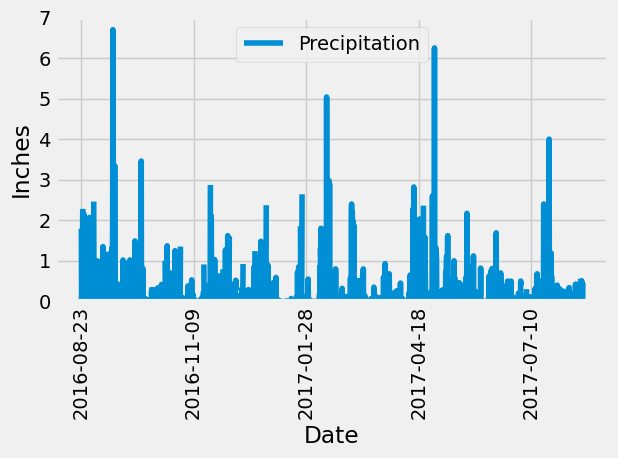

In [130]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
firstDate = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
monthly_prcp = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(monthly_prcp)
renamed_df = df.rename(columns = {'date':'Date','prcp':'Precipitation'})

# Sort the dataframe by date
sorted_df = renamed_df.sort_values(by = ['Date'])
monthly_df = sorted_df.set_index('Date')

# Use Pandas Plotting with Matplotlib to plot the data
monthly_df.plot()
plt.ylim(0,7)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()

In [131]:
# Use Pandas to calculate the summary statistics for the precipitation data
monthly_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [109]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [110]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).\
                            order_by(func.count(measurement.station).desc()).\
                            group_by(measurement.station).all() 
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
minmaxavg = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
                            filter(measurement.station == 'USC00519281').all()
minmaxavg

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

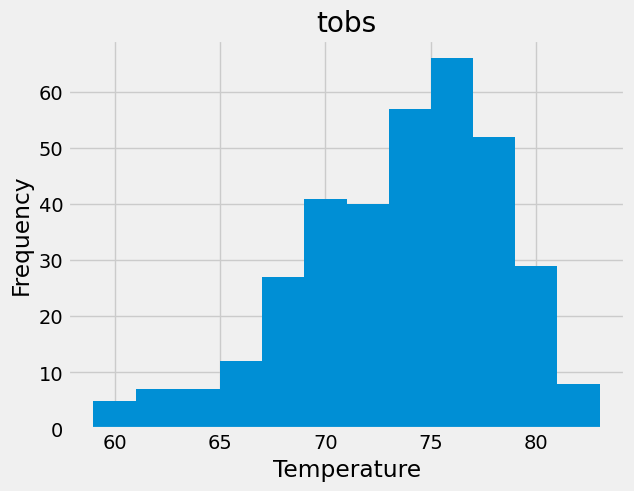

In [112]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temp_year = session.query(measurement.date, measurement.tobs).\
                            filter(measurement.date > '2016-08-23').filter(measurement.station =='USC00519281').all()

df =pd.DataFrame(station_temp_year)

df.hist(bins=12) 
plt.xlabel('Temperature')
plt.ylabel('Frequency')


# Close Session

In [113]:
# Close Session
session.close()